# SVM Classification and MLP Classification

In [133]:
# Importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [88]:
df = pd.read_csv("blood.csv")
df.columns

Index(['Recency', 'Frequency', 'Monetary', 'Time', 'Class'], dtype='object')

In [89]:
df

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


# EDA and Pre-processing

In [90]:
df.describe()

,Recency,Frequency,Monetary,Time,Class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [91]:
df.head()

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [92]:
df.shape

(748, 5)

In [93]:
df.isna().sum()

Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64

In [94]:
df.isna().sum()*100/df.shape[0]

Recency      0.0
Frequency    0.0
Monetary     0.0
Time         0.0
Class        0.0
dtype: float64

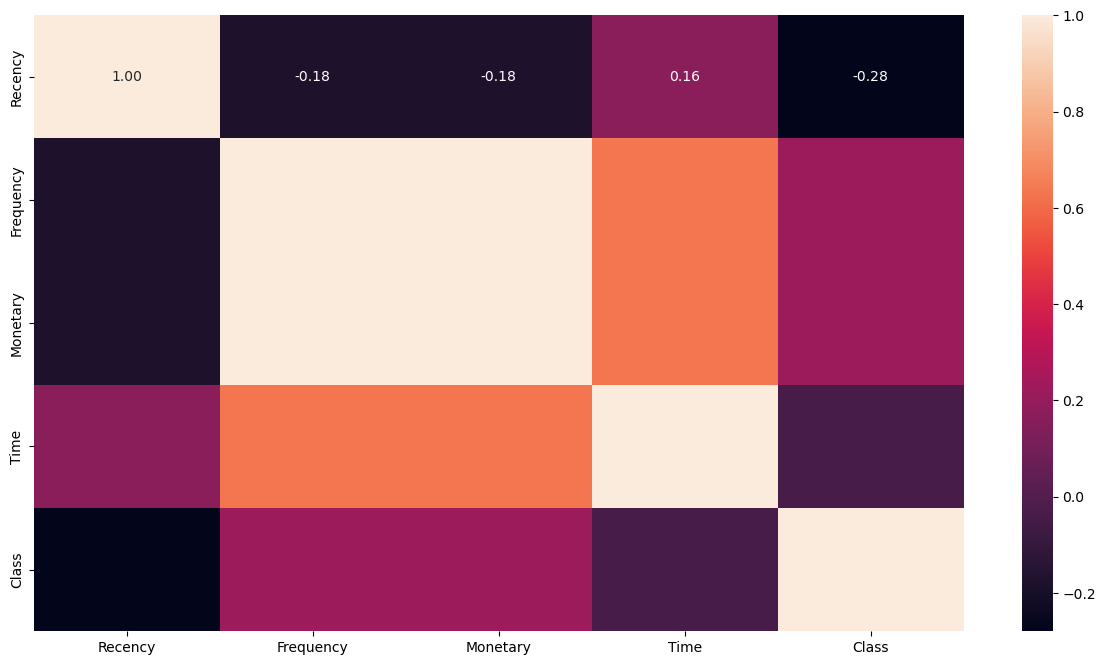

In [95]:
# Plotting the correlation between numerical variables
plt.figure(figsize = (15, 8))
sns.heatmap(df.iloc[:,0:9].corr(), annot = True, fmt = '0.2f');

In [98]:
#separate input and output data
x=df.drop('Class',axis=1);
y=df['Class']

In [99]:
# splitting the datatset into training and testing data
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)
x_train.shape , x_test.shape

((598, 4), (150, 4))

In [100]:
#scaling the data
scaler = StandardScaler()

In [101]:
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

# SVM Classification

In [102]:
svc = SVC(random_state=42)

In [103]:
svc.fit(x_train_sc,y_train)

SVC(random_state=42)

In [137]:
y_pred_svc = svc.predict(x_test_sc)

# MLP
An MLP, also known as a multi-layer perception, is a type of neural network with multiple layers.  
It consists of three key components:  
**Input Layer**: The initial layer that receives input features.  
**Hidden Layer(s)**: Intermediate layers between the input and output layers. These layers process information and learn representations.  
**Output Layer:** The final layer that produces the network’s predictions or classifications.  

MLPs are composed of fully connected dense layers.  
These layers transform input dimensions to the desired dimensions by applying weights and biases.  
Each neuron in a layer is connected to every neuron in the subsequent layer.  

**Activation Function:**  
Every node in the MLP uses a sigmoid activation function.  
The sigmoid function maps real values to the range [0, 1].  
It introduces non-linearity into the network, allowing it to learn complex patterns.  

In [106]:
mlp = MLPClassifier(solver='lbfgs',activation alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(x_train_sc, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1)

In [107]:
y_pred_mlp = mlp.predict(x_test_sc)

In [108]:
## Evaluating the models based on accuracy, precision and Confusion Matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [109]:
svc_eval = [accuracy_score(y_test,y_pred_svc),precision_score(y_test, y_pred_svc),recall_score(y_test, y_pred_svc),f1_score(y_test, y_pred_svc)]
mlp_eval = [accuracy_score(y_test,y_pred_mlp),precision_score(y_test, y_pred_mlp),recall_score(y_test, y_pred_mlp),f1_score(y_test, y_pred_mlp)]

In [110]:
print("SVC Classifier"), svc_eval

SVC Classifier


(None, [0.74, 0.6666666666666666, 0.0975609756097561, 0.1702127659574468])

In [111]:
print("MLP Classifier"), mlp_eval

MLP Classifier


(None, [0.7533333333333333, 0.75, 0.14634146341463414, 0.24489795918367344])

In [112]:
eval = pd.DataFrame(data=[svc_eval,mlp_eval],columns=['Accuracy','Precision','Recall','F1-Score'],index=['SVC','MLP'])
eval

,Accuracy,Precision,Recall,F1-Score
SVC,0.740000,0.666667,0.097561,0.170213
MLP,0.753333,0.750000,0.146341,0.244898


In [113]:
svc_cm=confusion_matrix(y_test,y_pred_svc)
mlp_cm=confusion_matrix(y_test,y_pred_mlp)

Text(0.5, 1.0, 'MLP Classification')

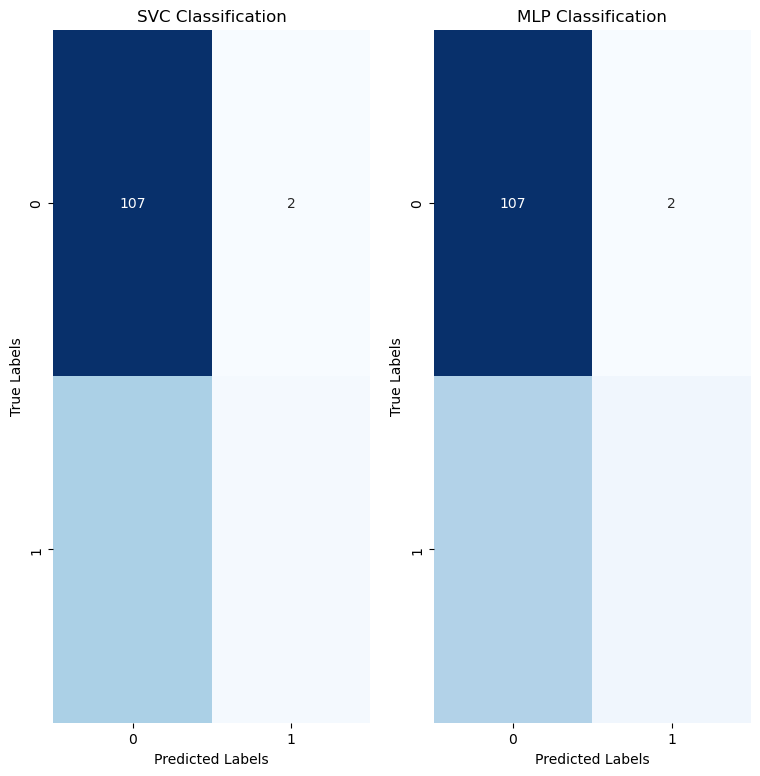

In [114]:
plt.figure(figsize=[9,9])
plt.subplot(1,2,1)
sns.heatmap(svc_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('SVC Classification')

plt.subplot(1,2,2)
sns.heatmap(mlp_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('MLP Classification')